<a href="https://colab.research.google.com/github/DiegoPincheiraIb/Experiencias_EL5206/blob/master/Experiencia_2/Experiencia_2_EL5206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuraciones Preliminares

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, exposure
import os
# pip install natsort # Se debe instalar natsorted para ejecutar el código
from natsort import natsorted

## Cargar datos a colab:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ojos_impostor.rar to ojos_impostor.rar
Saving ojos_test.rar to ojos_test.rar
Saving ojos_gal.rar to ojos_gal.rar


In [4]:
!unrar x ojos_gal.rar
!unrar x ojos_impostor.rar
!unrar x ojos_test.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ojos_gal.rar

Creating    ojos_gal                                                  OK
Extracting  ojos_gal/I10_gal.jpg                                           9%  OK 
Extracting  ojos_gal/I1_gal.jpg                                           19%  OK 
Extracting  ojos_gal/I2_gal.jpg                                           31%  OK 
Extracting  ojos_gal/I3_gal.jpg                                           42%  OK 
Extracting  ojos_gal/I4_gal.jpg                                           50%  OK 
Extracting  ojos_gal/I5_gal.jpg                                           60%  OK 
Extracting  ojos_gal/I6_gal.jpg                                           71%  OK 
Extracting  ojos_gal/I7_gal.jpg                                           79%  OK 
Extracting  ojos_gal/I8_gal.jpg                                           90%  OK 


In [5]:
!ls

ojos_gal      ojos_impostor	 ojos_test	sample_data
ojos_gal.rar  ojos_impostor.rar  ojos_test.rar


In [43]:
Str_Gal = 'ojos_gal/'
Str_Impostor = 'ojos_impostor/ojos_impostor/'
Str_Test = 'ojos_test/'
Listado_Gal = os.listdir(Str_Gal)
Listado_Gal = natsorted(Listado_Gal)
Listado_Impostor = os.listdir(Str_Impostor)
Listado_Impostor = natsorted(Listado_Impostor)
Listado_Test = os.listdir(Str_Test)
Listado_Test = natsorted(Listado_Test)

## Función para convertir a escala de grises:

In [48]:
Listado_Gal_Gris = []
for imagen in Listado_Gal:
  print(Str_Gal + imagen)
  Listado_Gal_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_Gal + imagen))))

Listado_Impostor_Gris = []
for imagen in Listado_Impostor:
  Listado_Impostor_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_Impostor + imagen))))

Listado_Test_Gris = []
for imagen in Listado_Test:
  print(Str_Test + imagen)
  Listado_Test_Gris.append(exposure.equalize_adapthist(color.rgb2gray(io.imread(Str_Test + imagen))))

ojos_gal/I1_gal.jpg
ojos_gal/I2_gal.jpg
ojos_gal/I3_gal.jpg
ojos_gal/I4_gal.jpg
ojos_gal/I5_gal.jpg
ojos_gal/I6_gal.jpg
ojos_gal/I7_gal.jpg
ojos_gal/I8_gal.jpg
ojos_gal/I9_gal.jpg
ojos_gal/I10_gal.jpg
ojos_test/I1_test.jpg
ojos_test/I2_test.jpg
ojos_test/I3_test.jpg
ojos_test/I4_test.jpg
ojos_test/I5_test.jpg
ojos_test/I6_test.jpg
ojos_test/I7_test.jpg
ojos_test/I8_test.jpg
ojos_test/I9_test.jpg
ojos_test/I10_test.jpg


# P1: Algoritmo LBP

In [9]:
def LBP(ImagenGris_Matriz):
  Matriz_Final_Copia = np.copy(ImagenGris_Matriz)
  Mascara_Valores = np.array([[128., 64., 32.],
                  [1., 0., 1.],
                  [2., 4., 8.]])
  for row in range(1,len(ImagenGris_Matriz)-1):
    for column in range(1,len(ImagenGris_Matriz[0])-1):
      mask = np.zeros((3,3))
      mask[1,1] = ImagenGris_Matriz[row,column]
      for fila in range(-1,2):
        for columna in range(-1,2):
          if fila != 0 and columna !=0:                      
            if ImagenGris_Matriz[row+fila,column+columna] > mask[1,1]:
              mask[fila, columna] = 1
      Numero_Entero = np.sum(mask * Mascara_Valores)
      Matriz_Final_Copia[row, column] = Numero_Entero

  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, -1, 0) # Elimina la última fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, -1, 1) # Elimina la última columna
  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, 0, 0) # Elimina la primera fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, 0, 1) # Elimina la primera columna
  return Matriz_Final_Copia
  
def Imagen_Plot(Matriz_Obj):
  plt.imshow(Matriz_Obj, cmap='gray')
  plt.show()

# P2: Extracción de vectores de características:

## Estirador_Imagen():
Dado una imagen objetivo, un paso y un ancho de ventana, "estira" una imagen.

In [12]:
def Estirador_Imagen(Imagen_Obj, Stride_Obj, Width_Obj):
  Matriz_Final = np.zeros((Stride_Obj,0))
  for row in range(0,len(Imagen_Obj),Stride_Obj): # Índices: 0, 100, 200, 300, 400
    for column in range(0, len(Imagen_Obj[0]),Stride_Obj): # Índices: 0, 100, 200, 300, 400, 500
      Mask = Imagen_Obj[row:row + Width_Obj,column:column + Width_Obj]
      Matriz_Final = np.concatenate((Matriz_Final,Mask),axis = 1)
  return Matriz_Final

## Calculador_Vector_Caract():
Dado una matriz y un paso, calcula histogramas tomando toda la imagen hacia abajo y moviendose en pasos regulares hacia la derecha, guardando los resultados de cada iteración en un arreglo.

In [11]:
def Calculador_Vector_Caract(Matriz_Obj,Stride_Obj, Width_Obj):
  Estirado_Obj = Estirador_Imagen(Matriz_Obj,Stride_Obj, Width_Obj)
  Vector_Caract_Obj = np.zeros((0,))
  for i in range(0,len(Matriz_Obj[0]),Stride_Obj):
    (Histogramas_Prueba, Bins_Prueba) = np.histogram(Estirador_Prueba[0:100,i:i + Stride_Obj], bins=59)
    Vector_Caract_Obj = np.concatenate((Vector_Caract_Obj,Histogramas_Prueba))
  return Vector_Caract_Obj

## Extraer_Caract():
Idéntica a la función anterior, con la salvedad que permite normalizar los histogramas que se calculan.

In [13]:
def Extraer_Caract(Imagen, Normalizar=False):
  Hist_Arr = np.zeros((0,))
  for row in range(0, Imagen.shape[0], 100): 
    for col in range(0, Imagen.shape[1], 100):
      hist, bin_edges = np.histogram(Imagen[row:row+100, col:col+100], bins=59, density=Normalizar)
      Hist_Arr = np.concatenate((Hist_Arr, hist))
  return Hist_Arr

# P3: Distancia

## Distancia():
Permite calcular la distancia punto a punto entre dos vectores dados.

In [20]:
def distancia(vec1, vec2):
  assert len(vec1) == len(vec2)
  n = len(vec1)
  dist = 0
  for i in range(0, n):
    dist = dist + abs(vec1[i] - vec2[i])
  return dist

# P4

## Base de datos:


### Aplicación de LBP a los datos:

In [49]:
Gal_LBP = []
Impostor_LBP = []
Test_LBP = []

for imagen in Listado_Gal_Gris:
  Gal_LBP.append(LBP(imagen))

for imagen in Listado_Impostor_Gris:
  Impostor_LBP.append(LBP(imagen))

for imagen in Listado_Test_Gris:
  Test_LBP.append(LBP(imagen))

### Extracción de características de los conjuntos

In [75]:
DB_Gal = []
for matriz in Gal_LBP:
  Gal_caract = Extraer_Caract(matriz, True)
  DB_Gal.append(Gal_caract)

DB_Test = []
for matriz in Test_LBP:
  Test_caract = Extraer_Caract(matriz, True)
  DB_Test.append(Test_caract)


# P5: Reconocimiento de los sujetos

### Reconocimiento():

In [81]:
def Reconocimiento(DB, lista, umbral):
  Cantidad_Reconocidos = 0
  Sujeto_Base_Datos = 1
  for caract in DB:
    Sujeto_a_comparar = 0
    Lista_Comparacion = []
    for matriz in lista:      
      test_caract = Extraer_Caract(matriz, True)
      Distancia_Elementos = distancia(caract, test_caract)
      Lista_Comparacion.append(Distancia_Elementos)
      if Distancia_Elementos <= umbral:
        Cantidad_Reconocidos += 1
      Sujeto_a_comparar += 1
    if min(Lista_Comparacion) < umbral:
      print('El sujeto ' + str(Lista_Comparacion.index(min(Lista_Comparacion)) + 1) +
          ' ha sido identificado como el sujeto ' + str(Sujeto_Base_Datos) +
          ' en nuestra base de datos. Distancia mínima: ' + str(min(Lista_Comparacion)))
    else:
      print('No se ha encontrado el sujeto en la base de datos.')
    Sujeto_Base_Datos += 1
  print('Cantidad de reconocimientos exitosos: ' + str(Cantidad_Reconocidos) + '/' + str(len(lista)))

In [ ]:
contador = Reconocimiento_2(DB_Gal, Test_LBP, 23)

# P6: Nueva versión de reconocimiento que discrimina quienes no estan en la base de datos.

In [96]:
def Reconocimiento_2(DB, lista, umbral):
  Lista_minimos = []
  Sujeto_Base_Datos = 1
  for matriz in lista:
    Sujeto_a_comparar = 0
    Lista_Comparacion = []
    for caract in DB:      
      test_caract = Extraer_Caract(matriz, True)
      Distancia_Elementos = distancia(caract, test_caract)
      Lista_Comparacion.append(Distancia_Elementos)
      Sujeto_a_comparar += 1
    if min(Lista_Comparacion) < umbral:
      Lista_minimos.append(min(Lista_Comparacion))
      print('El sujeto ' + str(Lista_Comparacion.index(min(Lista_Comparacion)) + 1) +
          ' ha sido identificado como el sujeto ' + str(Sujeto_Base_Datos) +
          ' en nuestra base de datos. Distancia mínima: ' + str(min(Lista_Comparacion)))
    else:
      print('No se ha encontrado el sujeto en la base de datos.')
    Sujeto_Base_Datos += 1
  print('Sujetos encontrados en la base de datos: ' + str(len(Lista_minimos)) + '/' + str(len(lista)))

In [97]:
contador = Reconocimiento_2(DB_Gal, Impostor_LBP, 23)

El sujeto 1 ha sido identificado como el sujeto 1 en nuestra base de datos. Distancia mínima: 21.321692307692295
El sujeto 2 ha sido identificado como el sujeto 2 en nuestra base de datos. Distancia mínima: 7.099061538461538
El sujeto 3 ha sido identificado como el sujeto 3 en nuestra base de datos. Distancia mínima: 11.92163076923077
El sujeto 4 ha sido identificado como el sujeto 4 en nuestra base de datos. Distancia mínima: 16.29943076923076
El sujeto 5 ha sido identificado como el sujeto 5 en nuestra base de datos. Distancia mínima: 18.337199999999992
El sujeto 6 ha sido identificado como el sujeto 6 en nuestra base de datos. Distancia mínima: 22.27295384615384
El sujeto 7 ha sido identificado como el sujeto 7 en nuestra base de datos. Distancia mínima: 18.628569230769234
El sujeto 8 ha sido identificado como el sujeto 8 en nuestra base de datos. Distancia mínima: 21.861769230769205
El sujeto 9 ha sido identificado como el sujeto 9 en nuestra base de datos. Distancia mínima: 20.182

Prueba:

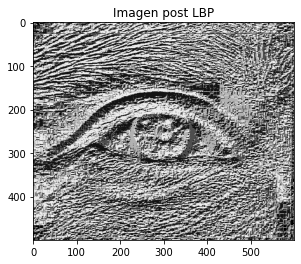

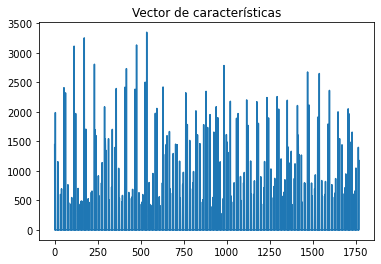

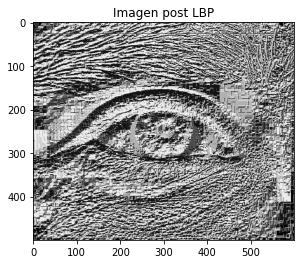

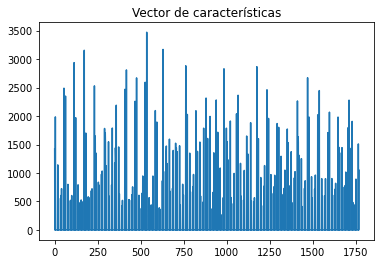

In [63]:
# --------------------------------------
Prueba = Listado_Impostor_Gris[1]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
hist_arr = Extraer_Caract(Matriz_LBP, True)
plt.plot(hist_arr)
plt.title('Vector de características')
plt.show()
# --------------------------------------
Prueba = Listado_Gal_Gris[1]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
hist_arr = Extraer_Caract(Matriz_LBP, True)
plt.plot(hist_arr)
plt.title('Vector de características')
plt.show()

In [ ]:
#Prueba = Listado_Gal_Gris[6]
#Matriz_LBP = LBP(Prueba)
Matriz_LBP = Test_LBP[6]
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
hist_arr = Extraer_Caract(Matriz_LBP)
plt.plot(hist_arr)
plt.title('Vector de características')
plt.show()

In [ ]:
print(distancia(DB_Gal[6],DB_Test[6]))